# EDA

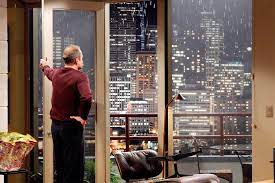

## Import basic libraries and set pandas format

In [185]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter

plt.rcParams.update(
    {"figure.figsize": (8, 5), "axes.facecolor": "white", "axes.edgecolor": "black"}
)
plt.rcParams["figure.facecolor"] = "w"
pd.plotting.register_matplotlib_converters()
pd.set_option("display.float_format", lambda x: "%.3f" % x)

## Import the data from .csv file

In [186]:
df = pd.read_csv("data/eda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

## Clean data
- drop columns not needed

In [187]:
df.drop(columns=["house_id", "id.1"], inplace=True)

- rename columns

In [188]:
df.rename(
    columns={
        "yr_built": "year_built",
        "yr_renovated": "year_renovated",
        "long": "lon",
        "date": "sales_date",
    },
    inplace=True,
)
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'lon', 'sqft_living15', 'sqft_lot15', 'sales_date', 'price'],
      dtype='object')

In [189]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


- check for duplicated rows

In [190]:
df.duplicated().value_counts()

False    21597
dtype: int64

--> no rows duplicated

### Impose data
- fill all NAN with 0 since for my customer it is not relevant to have these infos

In [191]:
df.year_renovated.fillna(0, inplace=True)
df.waterfront.fillna(0, inplace=True)
df.sqft_basement.fillna(0, inplace=True)
df.view.fillna(0, inplace=True)

### Check data types

In [192]:
df.dtypes

id                  int64
bedrooms          float64
bathrooms         float64
sqft_living       float64
sqft_lot          float64
floors            float64
waterfront        float64
view              float64
condition           int64
grade               int64
sqft_above        float64
sqft_basement     float64
year_built          int64
year_renovated    float64
zipcode             int64
lat               float64
lon               float64
sqft_living15     float64
sqft_lot15        float64
sales_date         object
price             float64
dtype: object

- bring year_renovated to correct year by dividing by 10

In [193]:
df.year_renovated = df.year_renovated / 10

- adjust datatypes to the correct format

In [194]:
df = df.astype(
    {
        "bedrooms": np.int16,
        "view": np.int16,
        "condition": np.int16,
        "grade": np.int16,
        "year_built": np.int16,
        "year_renovated": np.int16,
        "zipcode": np.int32,
        "waterfront": bool,
    },
)
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,year_built,year_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,sales_date,price
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,0.000,1955,0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,400.000,1951,1991,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,0.000,1933,0,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,910.000,1965,0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,0.000,1987,0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


### Format datetime and create new columns
- add datetime to year_built, year_renovated, sales_date

In [195]:
df["renovated"] = df.year_renovated.apply(lambda x: True if x > 1 else False)
df.sales_date = pd.to_datetime(df.sales_date, format="%Y-%m-%d")
df["sales_year"] = df.sales_date.dt.year
df["sales_month"] = df.sales_date.dt.month
df["sales_day"] = df.sales_date.dt.day
df["sales_day_of_week"] = df.sales_date.dt.dayofweek
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lon,sqft_living15,sqft_lot15,sales_date,price,renovated,sales_year,sales_month,sales_day,sales_day_of_week
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,-122.257,1340.000,5650.000,2014-10-13,221900.000,False,2014,10,13,0
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,-122.319,1690.000,7639.000,2014-12-09,538000.000,True,2014,12,9,1
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,-122.233,2720.000,8062.000,2015-02-25,180000.000,False,2015,2,25,2
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,-122.393,1360.000,5000.000,2014-12-09,604000.000,False,2014,12,9,1
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,-122.045,1800.000,7503.000,2015-02-18,510000.000,False,2015,2,18,2


### Insert new Columns
- get the prices per living-, lot-, living_neighbor- and lot_neighbor-area

In [196]:
df["price_per_sqft_living"] = df.price / df.sqft_living
df["price_per_sqft_lot"] = df.price / df.sqft_lot
df["price_per_sqft_living15"] = df.price / df.sqft_living15
df["price_per_sqft_lot15"] = df.price / df.sqft_lot15
df["price_per_sqft_mean"] = df.price / df[
    [
        "price_per_sqft_living",
        "price_per_sqft_lot",
        "price_per_sqft_living15",
        "price_per_sqft_lot15",
    ]
].mean(axis=1)

- create bins for bedrooms

In [197]:
df["bedrooms_categories"] = pd.cut(
    df["bedrooms"],
    bins=[0, 2, 4, 6, 8, 10, 200],
    labels=["1-2", "3-4", "5-6", "7-8", "9-10", "10+"],
)

## Hypotheses
- 'price' and 'sqft_.' correlate and can be combined to a vareable price/mean(sqft_*)
- a whealthy area is not supposed to fit the needs of the customer
- there is a time in the year when prices drop and houses are cheap
- houses not renovated are cheaper

## General overview
### Correlation of price and living-area

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Price'),
  Text(0, 1.5, 'living area'),
  Text(0, 2.5, 'living area neighborhood'),
  Text(0, 3.5, 'lot area'),
  Text(0, 4.5, 'lot area neighborhood')])

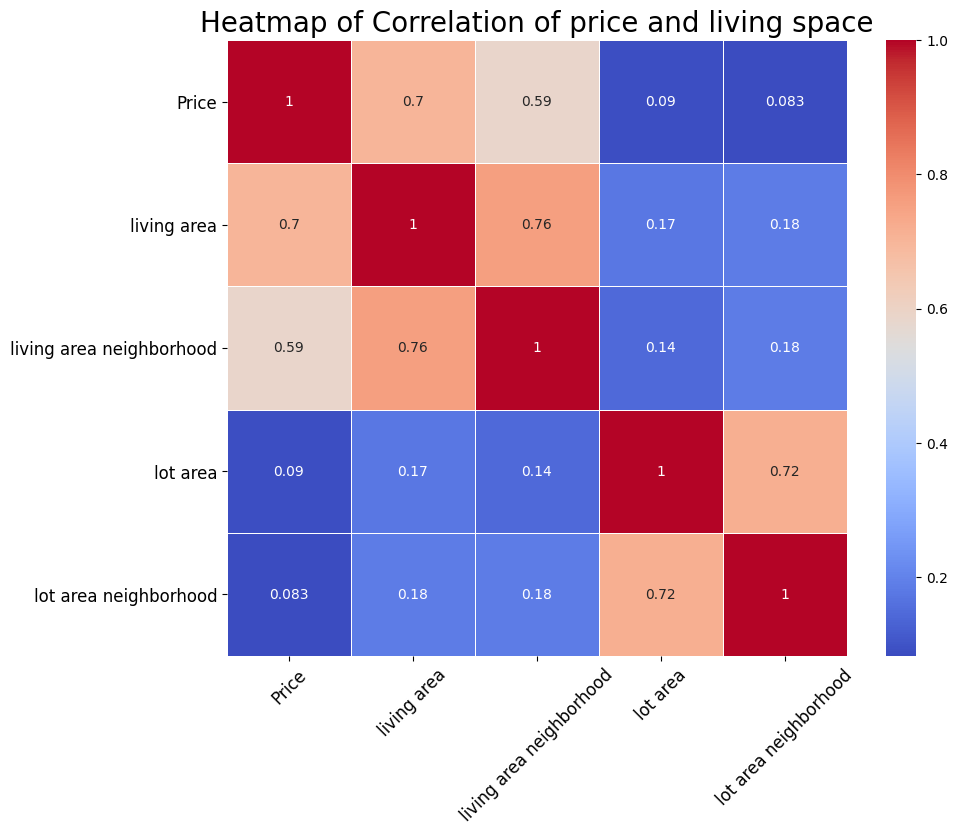

In [198]:
# draw the heatmap
plt.figure(figsize=(10, 8))
corr = df[["price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15"]].corr()
ax = sns.heatmap(
    corr,
    linewidths=0.5,
    annot=True,
    cmap="coolwarm",
    yticklabels=[
        "Price",
        "living area",
        "living area neighborhood",
        "lot area",
        "lot area neighborhood",
    ],
    xticklabels=[
        "Price",
        "living area",
        "living area neighborhood",
        "lot area",
        "lot area neighborhood",
    ],
)
plt.title(
    "Heatmap of Correlation of price and living space", fontsize=20
)  # title with fontsize 20
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

### Distribution of price over sqft
- plot the relation of price and area for living as a scatter plot

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

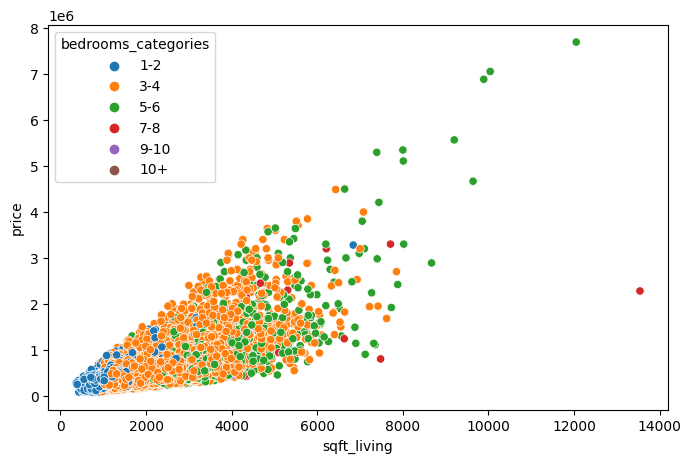

In [199]:
sns.scatterplot(data=df, x="sqft_living", y="price", hue="bedrooms_categories")

### Plot mean price per square footage for living space per zipcode
- colorcode relates to the price per living area
- dot size relates to the price

In [200]:
df_zipcodes = (
    df.groupby("zipcode")["lat", "lon", "price_per_sqft_living", "price"]
    .median()
    .reset_index()
)

fig = px.scatter_mapbox(
    df_zipcodes,
    lat="lat",
    lon="lon",
    hover_name="zipcode",
    hover_data=["price"],
    color="price_per_sqft_living",
    size="price",
    zoom=9,
    width=1000,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 10, "t": 10, "l": 10, "b": 10})
fig.show()

### What is the distribution of the prices? 
- data maybe skewed

[Text(0, 0.0, ''),
 Text(0, 200.0, ''),
 Text(0, 400.0, ''),
 Text(0, 600.0, ''),
 Text(0, 800.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1200.0, '')]

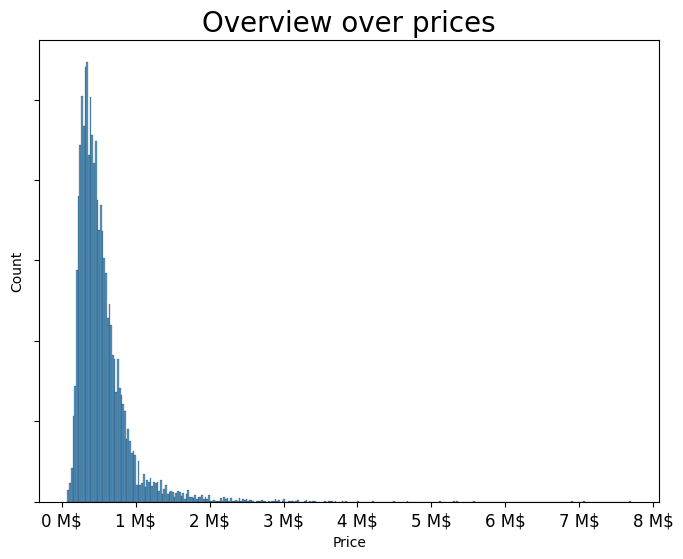

In [201]:
fig = plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x="price", stat="count")
plt.title("Overview over prices", fontsize=20)  # title with fontsize 20
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
xlabels = ["{:,.0f}".format(x) + " M$" for x in ax.get_xticks() / 1000000]
ax.set_xticklabels(xlabels)
plt.xlabel("Price")
plt.ylabel("Count")
ax.set_yticklabels("")

### Is the price related to the date?
- plot a boxplot to get an overview

<AxesSubplot:xlabel='sales_month', ylabel='price'>

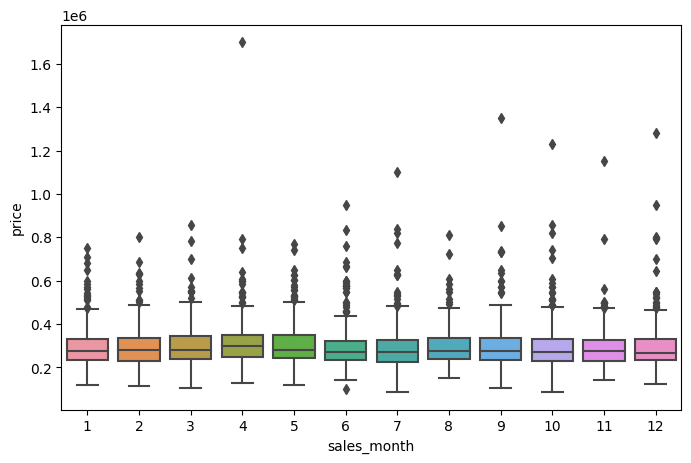

In [202]:
sns.boxplot(data=df_customer, x="sales_month", y="price")

It seems, that the price is only sligthly related to the month. 

### Is the price related to the day of week?
- make a simple line plot to get the idea

<AxesSubplot:xlabel='sales_day_of_week', ylabel='price_per_sqft_living'>

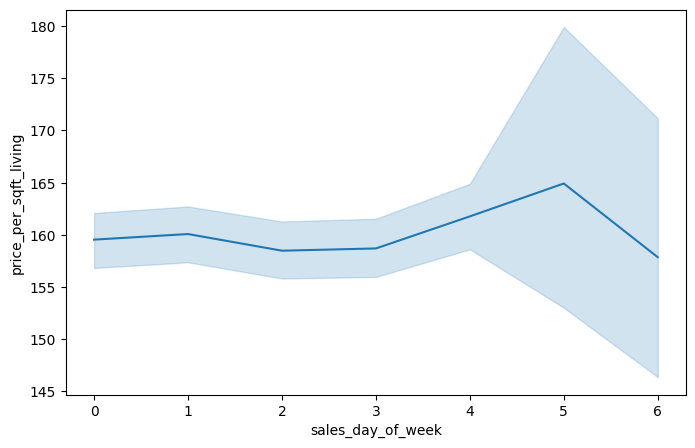

In [203]:
sns.lineplot(x=df_customer.sales_day_of_week, y=df_customer.price_per_sqft_living)

### Create a heatmap for customer with this information
- we want to find out, if the month in combination with the day of week plays a role

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Jan'),
  Text(0, 1.5, 'Feb'),
  Text(0, 2.5, 'March'),
  Text(0, 3.5, 'April'),
  Text(0, 4.5, 'May'),
  Text(0, 5.5, 'June'),
  Text(0, 6.5, 'July'),
  Text(0, 7.5, 'Aug'),
  Text(0, 8.5, 'Sept'),
  Text(0, 9.5, 'Oct'),
  Text(0, 10.5, 'Nov'),
  Text(0, 11.5, 'Dec')])

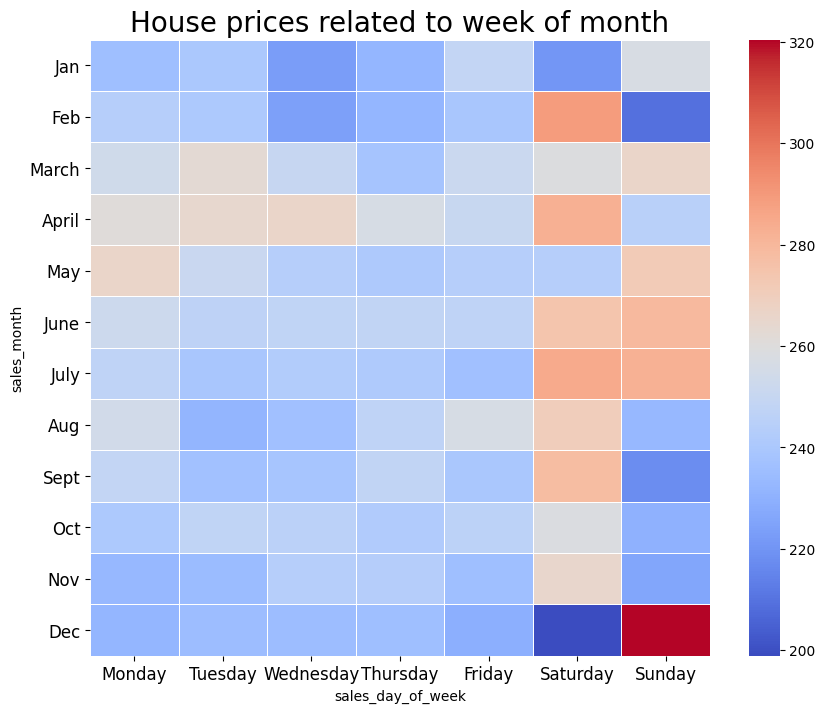

In [204]:
plt.figure(figsize=(10, 8))

df_time_relation = (
    df.groupby(["sales_month", "sales_day_of_week"])["price_per_sqft_living"]
    .median()
    .reset_index()
    .pivot(
        index="sales_month", columns="sales_day_of_week", values="price_per_sqft_living"
    )
)

ax = sns.heatmap(
    df_time_relation,
    linewidths=0.5,
    annot=False,
    cmap="coolwarm",
    yticklabels=[
        "Jan",
        "Feb",
        "March",
        "April",
        "May",
        "June",
        "July",
        "Aug",
        "Sept",
        "Oct",
        "Nov",
        "Dec",
    ],
    xticklabels=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

plt.title(
    "House prices related to week of month", fontsize=20
)  # title with fontsize 20
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)

holydays play a role for house sales: nope: the data suggest that week days are more important for the buyer

<AxesSubplot:xlabel='sales_day', ylabel='sales_month'>

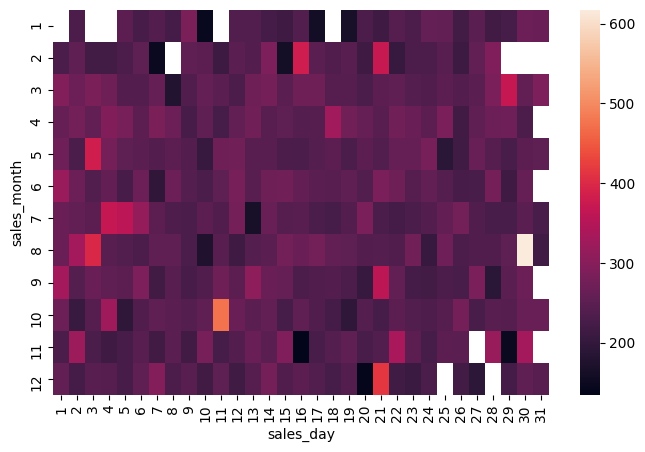

In [205]:
df_time_relation = (
    df.groupby(["sales_month", "sales_day"])["price_per_sqft_living"]
    .median()
    .reset_index()
    .pivot(index="sales_month", columns="sales_day", values="price_per_sqft_living")
)
sns.heatmap(
    df_time_relation,
)

## Reshape dataframe to the needs of the customer
- he has no money, so all houses with price above 1M$ are not of interest

In [206]:
df["affordable"] = df.price.apply(lambda x: True if x < 1000000 else False)
df_customer = df.query("affordable == True")
df_customer.affordable.unique()

array([ True])

- he needs room for 5 kids and himself, we look for a house with 3-10 rooms

In [207]:
rooms_10_or_less = df.bedrooms.apply(lambda x: True if 2 < x <= 10 else False)
df_customer = df[rooms_10_or_less]
df_customer.bedrooms.unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10], dtype=int16)

- set zipcodes to areas of interest

In [208]:
customer_zipcodes = (
    df.groupby("zipcode")
    .median("price")["price"]
    .reset_index()
    .query("price < 300000")["zipcode"]
    .to_list()
)
df_customer = df_customer[df_customer.zipcode.isin(customer_zipcodes)]
df_customer.zipcode.unique()

array([98178, 98003, 98198, 98030, 98002, 98001, 98023, 98148, 98042,
       98032, 98168, 98022, 98031, 98188, 98055], dtype=int32)

- good zip codes

In [227]:
nice_zipcodes = [
    98407,
    98055,
    98024,
    98037,
    98296,
    98166,
    98036,
    98337,
    98058,
    98332,
    98056,
    98045,
    98311,
    98010,
    98108,
    98038,
    98402,
    98335,
    98019,
    98026,
    98467,
    983770,
    98383,
    98043,
    98020,
    98388,
    98106,
    98466,
    98406,
    98118,
    98077,
    98059,
    98275,
    98155,
    98403,
    98327,
    98133,
    98065,
    98126,
    98011,
    98012,
    98136,
    98021,
    98104,
    98125,
    98028,
    98117,
    98027,
    98199,
    98039,
    98177,
    98119,
    98110,
    98034,
    98072,
    98116,
    98144,
    98053,
    98115,
    98075,
    98105,
    98008,
    98004,
    98005,
    98121,
    98052,
    98101,
    98109,
    98122,
    98007,
    98033,
    98040,
    98006,
    98103,
    98029,
    98102,
    98074,
    98007,
    98112,
]
recommended_zip_code = [zp for zp in customer_zipcodes if zp in nice_zipcodes]
df_customer = df_customer[df_customer.zipcode.isin(recommended_zip_code)]
df_customer.zipcode.unique()

array([98055], dtype=int32)

## Apply original plots to customer needs
- correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Price'),
  Text(0, 1.5, 'living area'),
  Text(0, 2.5, 'living area neighborhood'),
  Text(0, 3.5, 'lot area'),
  Text(0, 4.5, 'lot area neighborhood')])

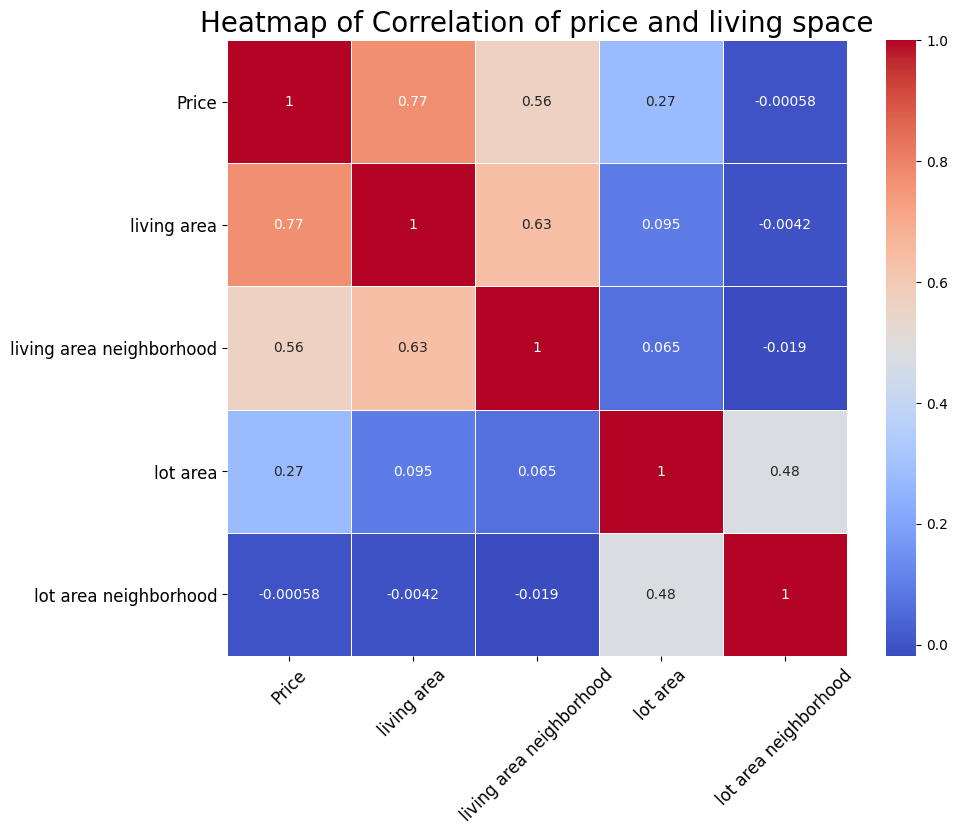

In [220]:
plt.figure(figsize=(10, 8))
corr = df_customer[
    ["price", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15"]
].corr()
ax = sns.heatmap(
    corr,
    linewidths=0.5,
    annot=True,
    cmap="coolwarm",
    yticklabels=[
        "Price",
        "living area",
        "living area neighborhood",
        "lot area",
        "lot area neighborhood",
    ],
    xticklabels=[
        "Price",
        "living area",
        "living area neighborhood",
        "lot area",
        "lot area neighborhood",
    ],
)
plt.title(
    "Heatmap of Correlation of price and living space", fontsize=20
)  # title with fontsize 20
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

- dirtribution of prices

[Text(0, 0.0, ''),
 Text(0, 5.0, ''),
 Text(0, 10.0, ''),
 Text(0, 15.0, ''),
 Text(0, 20.0, ''),
 Text(0, 25.0, ''),
 Text(0, 30.0, ''),
 Text(0, 35.0, '')]

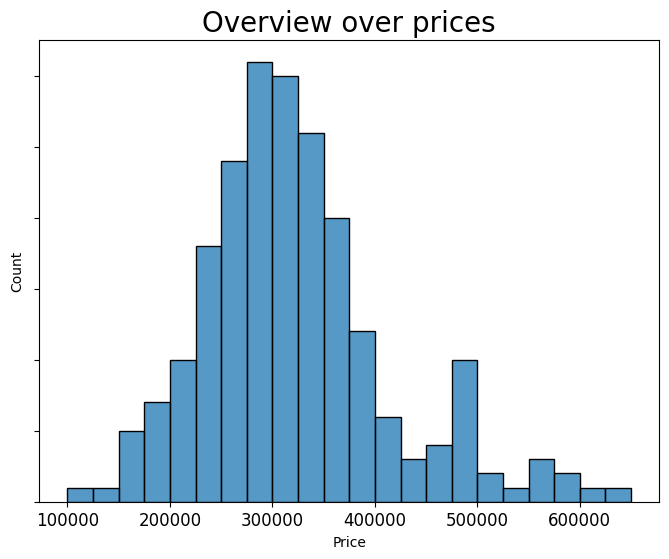

In [237]:
fig = plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_customer, x="price", stat="count", binwidth=25000)
plt.title("Overview over prices", fontsize=20)  # title with fontsize 20
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# xlabels = ['{:,.0f}'.format(x) + ' M$' for x in ax.get_xticks()/1000000]
# ax.set_xticklabels(xlabels)
plt.xlabel("Price")
# plt.ylabel("Count")
ax.set_yticklabels("")

- location

In [231]:
df_zipcodes_customer = (
    df_customer.groupby("zipcode")["lat", "lon", "price_per_sqft_living", "price"]
    .median()
    .reset_index()
)

fig = px.scatter_mapbox(
    df_zipcodes_customer,
    lat="lat",
    lon="lon",
    hover_name="zipcode",
    hover_data=["price"],
    color="price_per_sqft_living",
    size="price",
    zoom=9,
    width=1000,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 10, "t": 10, "l": 10, "b": 10})
fig.show()

- time

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'Jan'),
  Text(0, 1.5, 'Feb'),
  Text(0, 2.5, 'March'),
  Text(0, 3.5, 'April'),
  Text(0, 4.5, 'May'),
  Text(0, 5.5, 'June'),
  Text(0, 6.5, 'July'),
  Text(0, 7.5, 'Aug'),
  Text(0, 8.5, 'Sept'),
  Text(0, 9.5, 'Oct'),
  Text(0, 10.5, 'Nov'),
  Text(0, 11.5, 'Dec')])

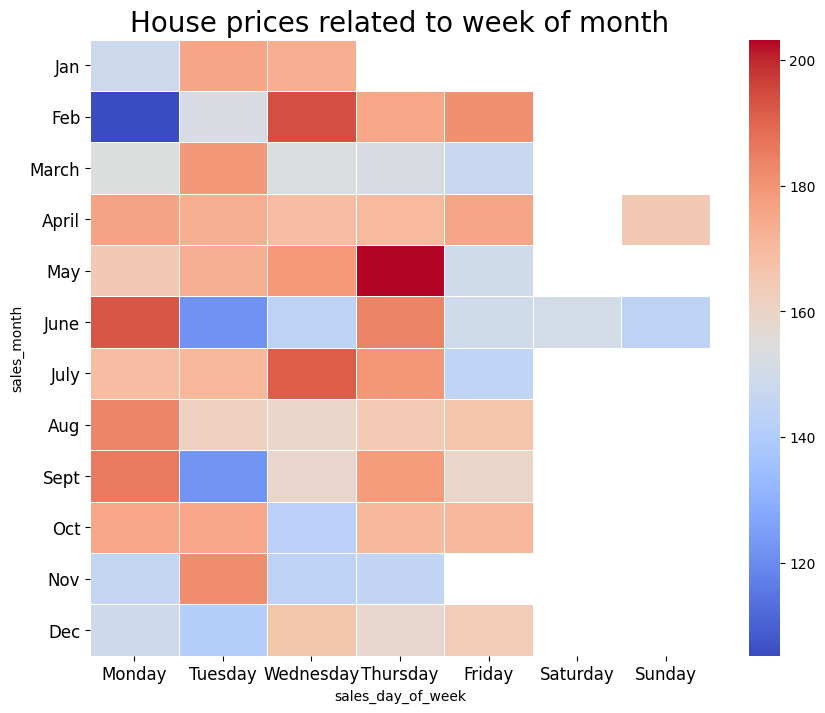

In [223]:
plt.figure(figsize=(10, 8))

df_time_relation = (
    df_customer.groupby(["sales_month", "sales_day_of_week"])["price_per_sqft_living"]
    .median()
    .reset_index()
    .pivot(
        index="sales_month", columns="sales_day_of_week", values="price_per_sqft_living"
    )
)

ax = sns.heatmap(
    df_time_relation,
    linewidths=0.5,
    annot=False,
    cmap="coolwarm",
    yticklabels=[
        "Jan",
        "Feb",
        "March",
        "April",
        "May",
        "June",
        "July",
        "Aug",
        "Sept",
        "Oct",
        "Nov",
        "Dec",
    ],
    xticklabels=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)

plt.title(
    "House prices related to week of month", fontsize=20
)  # title with fontsize 20
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12)

In [238]:
df_houses_customer = df_customer.query("2 < bedrooms < 8 and price < 250000")
fig = px.scatter_mapbox(
    df_houses_customer,
    lat="lat",
    lon="lon",
    hover_name="zipcode",
    hover_data=["price", "bedrooms", "renovated"],
    color="price",
    size="condition",
    zoom=9,
    width=800,
    height=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 10, "t": 10, "l": 10, "b": 10})
fig.show()

In [215]:
corr = df.corr("pearson")

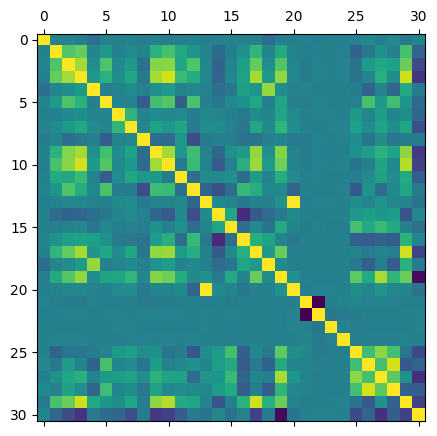

In [216]:
plt.matshow(df.corr())
plt.show()

In [217]:
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'lon', 'sqft_living15', 'sqft_lot15', 'sales_date', 'price',
       'renovated', 'sales_year', 'sales_month', 'sales_day',
       'sales_day_of_week', 'price_per_sqft_living', 'price_per_sqft_lot',
       'price_per_sqft_living15', 'price_per_sqft_lot15',
       'price_per_sqft_mean', 'bedrooms_categories', 'affordable'],
      dtype='object')